In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def _build_dataframe_from_csv(filename):
    df = pd.read_csv(filename, sep=",", encoding="latin1")
    return df

In [24]:
df = _build_dataframe_from_csv("data/Hapiness-Report.csv")
columns = ["Pays", "Année", "Echelle de vie", "logGDP", "Support social", "Espérance de vie", "", "Générosité", "Perception de la corruption", "Effets positifs", "Effets négatifs"]
df.columns = columns
display(df)

,Pays,Année,Echelle de vie,logGDP,Support social,Espérance de vie,,Générosité,Perception de la corruption,Effets positifs,Effets négatifs
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


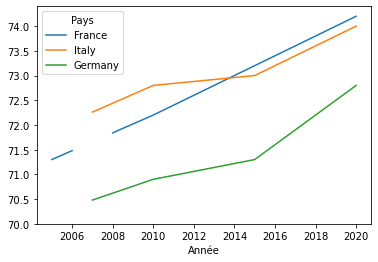

In [72]:
years = df["Année"].unique()

dfpivot = df.pivot(index = "Pays", columns = "Année", values = "Espérance de vie")

#print(df[df.isna().any(axis=1)])

dfpivot.transpose()[["France", "Italy", "Germany"]].plot()
plt.show()
#display(dfpivot.isna().sum().sum())
#display(len(dfpivot) * len(dfpivot.columns))